# 삼성 멀티캠퍼스 Pandas를 이용한 데이터 분석

## Pandas 연습 문제
- 남아수의 총합을 구하시오
- 여아수의 평균을 구하시오
- 남아수가 가장 많은 년도와 남아수를 구하시오
- 2000년도 이후 데이터를 구하시오
- 1995년 ~ 2000년도 데이터를 구하시오
- 남아출생이 가장 많은 top5를 구하시오 ( 년도와 남아수 )
- 남아 출생비율(%) 컬럼을 추가하고, 여아수 기준 남아수가 차지하는 비율을 보이시오 ex) 50,70 등
- 2000년도 이후 데이터에 대해서 출생량 컬럼을 추가하고 남아수 1800000 이상이면 많음 아니면 적음이라고 보이시오
- 1800년대, 1900년대, 2000년대 각 남아,여아수 평균을 구하시오

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_table('./births.txt',
                   header=None,
                   sep=',',
                   index_col = 0)
df.columns = ['남아수','여아수']
df.index.name = '연도'
df.shape # 132, 2
df

,남아수,여아수
연도,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
1885,133055,107800
1886,144535,110784
1887,145982,101414
1888,178627,120853


> 남아수의 총합을 구하시오

In [16]:
print('남아수의 총합 : ',df['남아수'].sum())

남아수의 총합 :  161802441


> 여아수의 평균을 구하시오

In [17]:
print('여아수의 평균 : ',df['남아수'].mean())

여아수의 평균 :  1225776.0681818181


> 남아수가 가장 많은 년도와 남아수를 구하시오

In [95]:
# print( '남아수가 가장 많은 연도 : ', df[df['남아수'] == df['남아수'].max()] )
df['남아수'].idxmax(), df['남아수'].max()
df[df['남아수']==df['남아수'].max()]

,남아수,여아수,남아 출생비율
연도,,,
1957,2044160,2155866,0.486702


> 2000년도 이후 데이터를 구하시오

In [32]:
df[df.index>=2000]

,남아수,여아수
연도,,
2000,1814601,1962406
2001,1799049,1941251
2002,1795206,1939815
2003,1825359,1973434
2004,1834145,1982794
2005,1845379,1994841
2006,1898463,2052377
2007,1919408,2072139
2008,1887234,2036289


> 1995년 ~ 2000년도 데이터를 구하시오

In [33]:
df[(df.index>=1995)&(df.index<=2000)]

,남아수,여아수
연도,,
1995,1757927,1902832
1996,1752249,1893378
1997,1739806,1884122
1998,1765915,1910250
1999,1772632,1918809
2000,1814601,1962406


> 남아출생이 가장 많은 top5를 구하시오 ( 년도와 남아수 )

In [98]:
# df['남아수'].sort_values(ascending=False)[0:5]
df.sort_values(by='남아수',ascending=False)[0:5]['남아수']

연도
1957    2044160
1959    2023044
1960    2022093
1961    2017316
1958    2010884
Name: 남아수, dtype: int64

> 남아 출생비율(%) 컬럼을 추가하고, 여아수 기준 남아수가 차지하는 비율을 보이시오 ex) 50,70 등

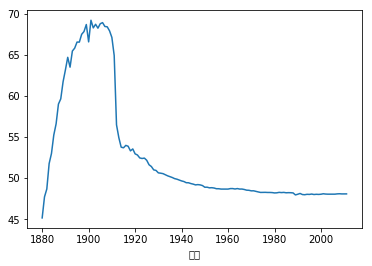

In [100]:
df['남아 출생비율'] = df['남아수']/(df['남아수'] + df['여아수']) * 100
df['남아 출생비율'].plot(kind='line')
plt.show()

> 2000년도 이후 데이터에 대해서 출생량 컬럼을 추가하고 남아수 1800000 이상이면 많음 아니면 적음이라고 보이시오

In [88]:
# for u,v in df[df.index>=2000]['남아수'].items:
#     if df.u['남아수'] >= 1800000:
#         df.u['남아 출생량'] = '많음'
#     else:
#         df.u['남아 출생량'] = '적음'
        
# for index,row in df.iterrows():
#     if row['남아수'] > 1800000:
#         row['남아 출생량'] = '많음'
#     else:
#         row['남아 출생량'] = '적음'
        

df[df.index>=2000]['남아수'].values[0]
for i in range(len(df[df.index>=2000]['남아수'].values)):
    if df[df.index>=2000]['남아수'].values[i] > 1800000:
        df[df.index>=2000]['남아 출생량'] = '많음'
    else:
        df[df.index>=2000]['남아 출생량'] = '적음'

df
# df[df.index>=2000]['남아 출생량'] = '많음' if df[df.index>=2000]['남아수'].values >= 1800000 else '적음'

# df[df.index>=2000]['남아수']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,남아수,여아수,남아 출생비율
연도,,,
1880,90993,110491,0.451614
1881,91954,100745,0.477190
1882,107850,113688,0.486824
1883,112321,104629,0.517728
1884,129022,114445,0.529936
1885,133055,107800,0.552428
1886,144535,110784,0.566096
1887,145982,101414,0.590074
1888,178627,120853,0.596457


> 1800년대, 1900년대, 2000년대 각 남아,여아수 평균을 구하시오

In [50]:
print('1800년대 남아수 평균 : ',df[(df.index>=1800)&(df.index<1900)]['남아수'].mean())
print('1800년대 여아수 평균 : ',df[(df.index>=1800)&(df.index<1900)]['여아수'].mean())
print('-'*50)

print('1900년대 남아수 평균 : ',df[(df.index>=1900)&(df.index<2000)]['남아수'].mean())
print('1900년대 여아수 평균 : ',df[(df.index>=1900)&(df.index<2000)]['여아수'].mean())
print('-'*50)

print('2000년대 남아수 평균 : ',df[(df.index>=2000)&(df.index<=2011)]['남아수'].mean())
print('2000년대 여아수 평균 : ',df[(df.index>=2000)&(df.index<=2011)]['여아수'].mean())

1800년대 남아수 평균 :  176714.15
1800년대 여아수 평균 :  111820.55
--------------------------------------------------
1900년대 남아수 평균 :  1362901.51
1900년대 여아수 평균 :  1384145.55
--------------------------------------------------
2000년대 남아수 평균 :  1831500.5833333333
2000년대 여아수 평균 :  1978477.5
